# Affect of Wind, Rain, RF, and Temperature on Spread of Future Wildfires

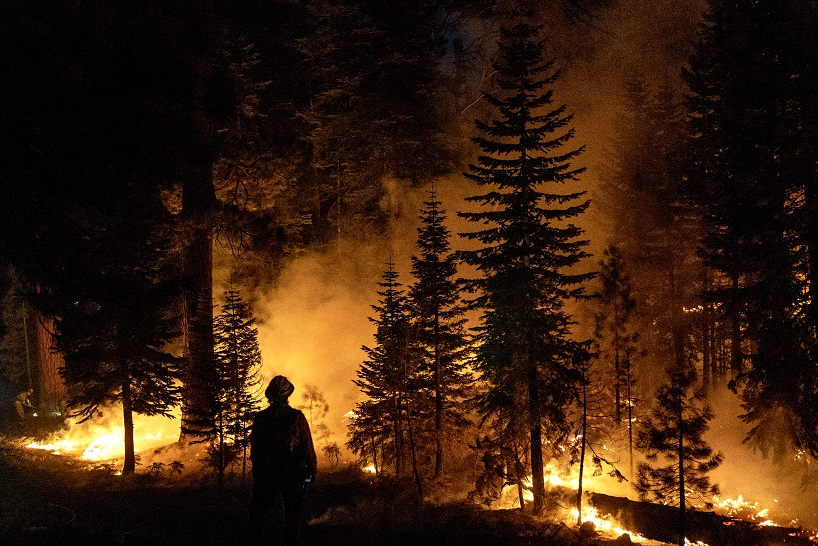

https://wildlife.ca.gov/portals/0/Images/Science_institute/Biodiversity/Wildfire/Donnell_fire.jpg

Project inspiration was drawn from this Article:

[1] Arif M, Alghamdi KK, Sahel SA, et al.(2021) Role of Machine Learning Algorithms in Forest Fire Management: A Literature Review. J Robotics Autom 5(1):212-226.
https://scholars.direct/Articles/robotics/jra-5-024.php?jid=robotics

[2] A Data Mining Approach to Predict Forest Fires using Meteorological Data: http://www3.dsi.uminho.pt/pcortez/fires.pdf

We wil be ultizing the forest fires Data set: https://archive.ics.uci.edu/ml/datasets/Forest+Fires. The dataset (forest.csv) is made available in this repository for reference.

To create system to prevent forest fires, we need to understand the causes of forest fires. To do so, we will try to predict and explain the cause of forest fires. [1]

The important area of research this project will focus on is: 

    •  Prediction of Spread of Wildfire (burned area in future) due to wind, rain, RF, and temperature respectivly 

### Importing the Necessary Libraries and Defining Auxillary Functions

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils

### Downloading Data

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1403c94914e542249d4a494335cb6479 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1403c94914e542249d4a494335cb6479 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1403c94914e542249d4a494335cb6479 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lP1AA3pUGJVzdSkTSQd2yabrYNKkTSruQPkwmyDp6dHV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1403c94914e542249d4a494335cb6479)

body = client_1403c94914e542249d4a494335cb6479.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-g3yircsb5o9z4y',Key='forestfires.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

### Understading the Data 

The forestfires.csv contains model-specific info contains the following attribute information: [1]

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

# Goal of this investigation

We will build a machine learning pipeline to predict the spread of wildfire in the northeaster region of Portugal.

This begans with preprocessing to standardize the data, and then Train_test_split to split the data into training and testing. A logistic regression and support vectore machine model will be used to obtain a prediction. 

Further, we will analyize the affect of each of the 4 variables seperatly to see which attribute provides the most accurate prediction use a log(x+1) function to train our model. The accuracy will be rate using R2 scores. 

## 1.  Creating the data frame 

In [5]:
data = pd.read_csv(body)
# Reading the first five rows
data.head()
# Selecting the features we want to use for regression
cdf = data[['temp','RH','wind','rain','area']]
cdf.head()

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.0
1,18.0,33,0.9,0.0,0.0
2,14.6,33,1.3,0.0,0.0
3,8.3,97,4.0,0.2,0.0
4,11.4,99,1.8,0.0,0.0


## Visualizing the data 

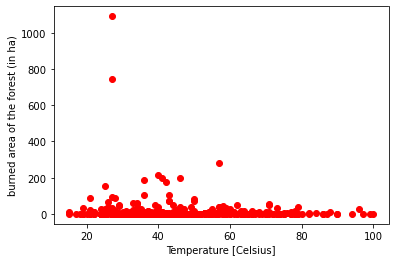

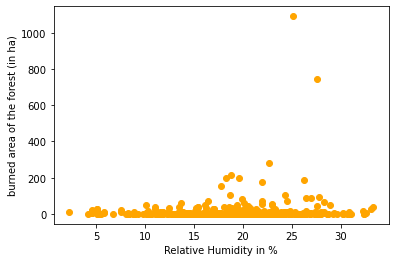

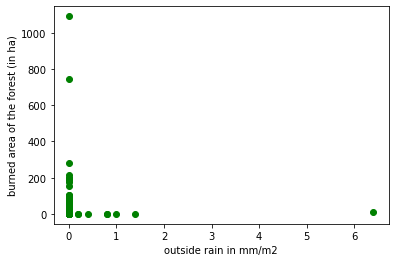

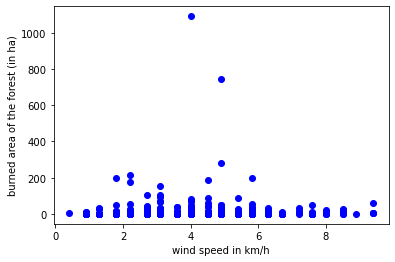

In [4]:
plt.scatter(cdf['RH'], cdf['area'],  color='red')
plt.xlabel("Temperature [Celsius]")
plt.ylabel("burned area of the forest (in ha)")
plt.show()

plt.scatter(cdf['temp'], cdf['area'],  color='orange')
plt.xlabel("Relative Humidity in %")
plt.ylabel("burned area of the forest (in ha)")
plt.show()

plt.scatter(cdf['rain'], cdf['area'],  color='green')
plt.xlabel("outside rain in mm/m2")
plt.ylabel("burned area of the forest (in ha)")
plt.show()

plt.scatter(cdf['wind'], cdf['area'],  color='blue')
plt.xlabel("wind speed in km/h")
plt.ylabel("burned area of the forest (in ha)")
plt.show()

## 2. Cleaning, Preprocessing and Sorting the Data 

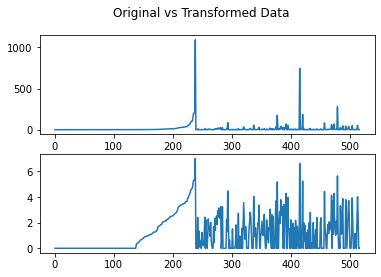

In [28]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('Original vs Transformed Data')

Y = cdf['area'].to_numpy()
Yold = Y
axs[0].plot(Y) # plotting by columns

# Transform the array data values with the ln(x+1) function
Y = np.log(Y+1)
axs[1].plot(Y) # plotting by columns

data["area"] = np.log(data["area"]+1)
data['area'] = cdf['area']

## 3. Forming the training and test data

Splitting the data into testing and training sets wherein we train the model using the training set and test with the testing set. This provides the model with an out-of-sample accuracy because the testing dataset is not part of the dataset used to train the model. Thus, providing a better understanding of how well our model generalizes on new data.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function:

In [31]:
# Standardize the data in X then reassign it to the variable X 
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(cdf)
X = pd.DataFrame(x_scaled)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#print("1\n",X_train,"\n2", X_test,"\n3",Y_train,"\n4",Y_test)

Since SVM and Logistec regression are a classifiers, the target output must be integers rather than floats in Y_train. Convert Y_train to integers using the labelEncoder function. source: https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous

In [32]:
lab_enc = preprocessing.LabelEncoder()
Y_trainEncoded = lab_enc.fit_transform(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(Y_trainEncoded))

continuous
multiclass
multiclass


### Hypertuning Tuning with GridSearchCV 

We use GridSearchCV to hyptertune the paramters n order to determine the optimal values for a given model. The the predefined parameters values passed into the GridSearchCV function were chosen on the basis of accuracy with the actual results. source: https://www.mygreatlearning.com/blog/gridsearchcv/

## 4a. Support Vector Machine Classification

We began by modelling and training using the The support vector machine classification is an alogorithm used to find a hyperplane in the N-dimensional space that has maximum margin - maximum distanace between the data points of the classes. source: https://web.mit.edu/6.034/wwwbob/svm.pdf

In [10]:
# Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. 
# Fit the object to find the best parameters from the dictionary parameters.

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm.fit(X_train, Y_trainEncoded)
svm_cv = GridSearchCV(svm,parameters,n_jobs=-10)
svm_cv.fit(X_train, Y_trainEncoded)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=SVC(), n_jobs=-10,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [24]:
# Predict using our testset
yhat = svm_cv.predict(X_test)
print('predicted values :', yhat, '\nvs\n', Y_test)

predicted values : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
vs
 [0.         1.16627094 0.41871033 0.         0.         0.
 0.         0.         0.         0.         3.91939576 0.
 5.63310962 0.90016135 1.53471437 1.4632554  0.         0.
 0.         3.69759139 0.         3.39249294 2.50470928 1.06471074
 1.68639895 0.         0.43825493 0.15700375 1.32175584 0.
 0.         1.01160091 0.         0.54232429 0.94000726 0.78390154
 3.38979934 2.74534599 0.         1.43270073 0.         0.88789126
 0.         0.         0.         0.         0.         0.
 1.20896035 0.         3.6076694  3.38979934 3.24921102 0.
 0.         2.70738331 1.53255687 0.         0.         2.81180944
 0.         0.         0.3435897  1.8531681  2.34276688 0.
 0.         2.12823171 0.         1.82131827 0.         1.30562646
 2.48989419 0.66

As seen by the predicted values, burnt area found was 0 which is not all accurate, so there is no point of displaying the accuracy scores.

## 4b. Logistic-Regression
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

Logistic Regression is a classification technique that falls under a linear classifier. It determines the best preditced weigths (aka coefficents/parameters) through the maximum likelihood estimation which maximizes the log-likilood functions for obervations i = 1, ..., i, represented the by equations LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).

source: https://realpython.com/logistic-regression-python/#classification

In [33]:
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,Y_trainEncoded)

In [35]:
# Draw predictions using trained model
yhat = LR.predict(X_test)
print('first 5 predicted values :', yhat)

first 5 predicted values : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Like in SVM, the As seen the burnt area found was 0, with there being no point to display the accuracy scores.

## 4c. Non Linear Regression

The simple appraoch would be to train a multiple linear model, however, from the above scatter points in can be seen that the data is non linear and so that model - like the two above, would not provide accurate predictions.

Instead, we will break the 4 attributes - Wind, Rain, RF, and Temperature and see their respective affect on prediction of size of burnt areas in wildfires. These predictions will be modelled using log function which could be a good approximation based off the scatter plots drawn above. 

In [7]:
# split data into train/test
msk = np.random.rand(len(cdf)) < 0.8
train_x = cdf[msk]
test_x = cdf[~msk]
train_y = cdf[msk]
test_y = cdf[~msk]

### Rain vs Area

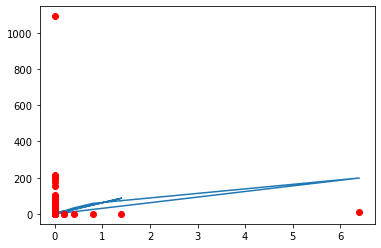

In [24]:
# predtict using log fuction
y_hat = np.log(train_x["rain"].values+1)

#plot initial prediction against datapoints
plt.plot(train_x["rain"], y_hat*99)
plt.plot(train_x["rain"], train_y["area"], 'ro')

In [25]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - train_y["area"])))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - train_y["area"])))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score( train_y["area"], y_hat) )

Mean absolute error: 11.56
Residual sum of squares (MSE): -11.55
R2-score: -0.04


### Temp vs Area

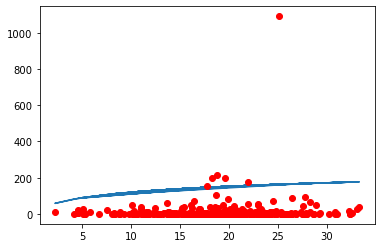

In [10]:
# Lets look at a sample sigmoid line that might fit with the data
# predtict using log fuction
y_hat = np.log(train_x["temp"].values+1)

#plot initial prediction against datapoints
plt.plot(train_x["temp"], y_hat*50)
plt.plot(train_x["temp"], train_y["area"], 'ro')

In [11]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - train_y["temp"])))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - train_y["temp"])))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score( train_y["temp"], y_hat) )

Mean absolute error: 15.82
Residual sum of squares (MSE): -15.82
R2-score: -7.48


### Wind vs Area

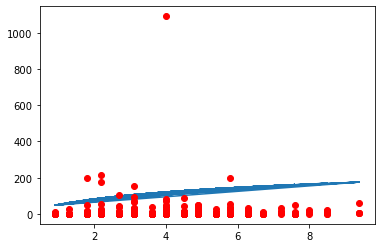

In [12]:
# Lets look at a sample sigmoid line that might fit with the data
# predtict using log fuction
y_hat = np.log(train_x["wind"].values+1)

#plot initial prediction against datapoints
plt.plot(train_x["wind"], y_hat*75)
plt.plot(train_x["wind"], train_y["area"], 'ro')

In [13]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - train_y["wind"])))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - train_y["wind"])))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score( train_y["wind"], y_hat) )

Mean absolute error: 2.50
Residual sum of squares (MSE): -2.50
R2-score: -1.57


### RH vs Area

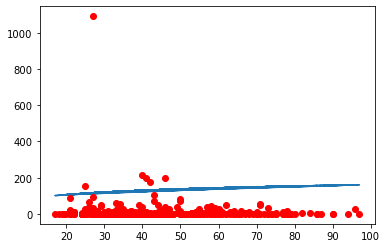

In [14]:
# Lets look at a sample sigmoid line that might fit with the data
# predtict using log fuction
y_hat = np.log(train_x["RH"].values+1)

#plot initial prediction against datapoints
plt.plot(train_x["RH"], y_hat*35)
plt.plot(train_x["RH"], train_y["area"], 'ro')

In [15]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - train_y["RH"])))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - train_y["RH"])))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score( train_y["RH"], y_hat) )

Mean absolute error: 40.30
Residual sum of squares (MSE): -40.30
R2-score: -6.24


# 5. Conclusion 

Lets begin with looking at section 4c, based on the R2 scores, the best predictors is rain which has a score of -0.04. Further, the ideal method into predicting the burn area of a forest fire is by analyzing the forecasted rain in mm/m2.

This result is supported by experience fire fighters who argue that "... it [rain] will start to saturate the fuel sources surrounding the blaze ... rain only delays the fires spread" . Indicating that more the rain, the more saturated the fires become, leading to smaller blazes and lower likelihood of the fire spreading.https://www.quora.com/What-is-the-effect-of-rain-on-an-existing-forest-fire-Does-it-help-significantly

However, since Forest Fires are currently more common in areas of drougth such as California desert, it seems that current trends support our predictor. Moreover, in places like Nevada where the rain causes a burst in vegetation growth that followed with large fire. All in all, more extension investigation on the effect rainfalls on forestfires is demanded for a better conclusion on the relation between rain and area of forest burnt. A more complex regression model would be a good point to start.

Looking at sections 4a and 4b, these results are not an accurate prediction. More focus needs to be put on SVM to obtain a better model. In the next approach to this problem, will be to use Sequential Minimal Optimization algorithm was used to fit the SVM. This article would provide a great segment on to this next approach:

https://jonchar.net/notebooks/SVM/

By: Fatima Siddiqui 